In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')

## plotting a bar chart between two qualitative variables

#### converting VCLass column from plain object type into ordered categorical type

In [6]:
#types of sedans
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

#Returns the type of sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories=sedan_classes)

#Use pandas.astype() to convert the vclass column from plain object into ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

#### add new column for transmission type - Automatic or Manual

In [7]:
# The existing 'trans' columnb has multiple sub_types of Automatic and Manual.
# But, we need plain two types, either Automatic or Manual.  Therefore, add a new column

#The Series.apply() method invokes the 'lamba' function on each valu of the 'trans' column
#In python, a lambda function is an anonynous function that can have only one expression
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


#### plotting the clustered bar chart on transmission type and vehicle class (for volume)

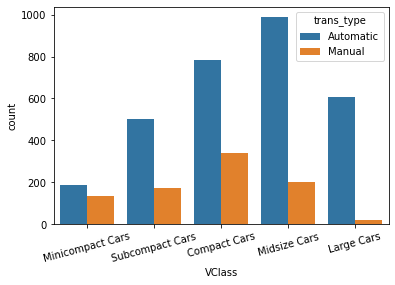

In [9]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

## Alternative way of plotting the volume of two qual variables - heatmap

Heatmaps can be used as a 2D version of a histogram as seen in the heat maps notebook.  
They can also be used as a 2D version of a bar chart as we'll see below.

use sns.heatmap() for the bar chart version of the heatmap  
summarization is needed before using this type of heatmap however

#### Getting data into desirable format - a Dataframe

In [14]:
#use group_by() and size() to get the number of cars and each combination of the two variables as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

In [12]:
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [17]:
#using Series.reset_index() to convert a series into a dataframe
ct_counts=ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [18]:
#pivotting to rearrange the data to have vehicle class on rows
ct_counts = ct_counts.pivot(index ='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


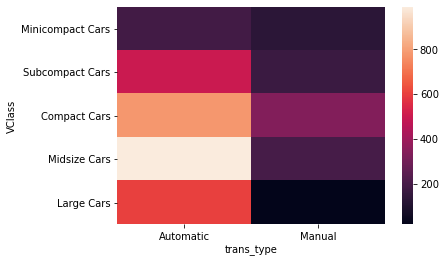

In [20]:
#plotting heat map
sns.heatmap(ct_counts);

### adding extras to heatmaps such as annotations

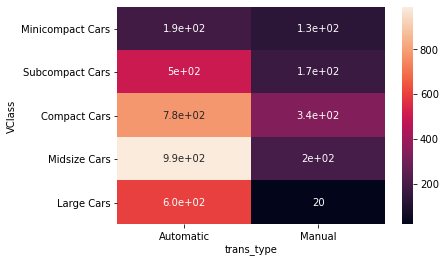

In [22]:
sns.heatmap(ct_counts, annot=True);

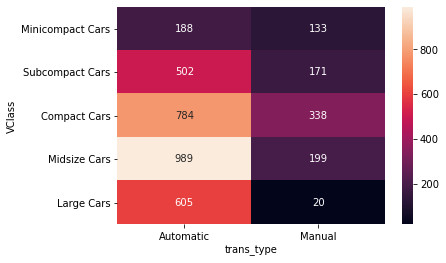

In [25]:
#making the annotations into digits
sns.heatmap(ct_counts, annot=True, fmt='d');
#note that if there were cells with no values, to prevent NaNs from showing up use fmt= '.0f'